# Visualizing loss graph and generated samples

In [1]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import pandas as pd
import seaborn as sns

### Kde plot of true samples and generated samples

In [2]:
#decide plotting area ([-plot_lim, plot_lim] x [-plot_lim, plot_lim])
plot_lim = 2

C:\Users\alber\Anaconda3\lib\site-packages\seaborn\distributions.py:1184: UserWarning: The following kwargs were not used by contour: 's'
  **contour_kws,


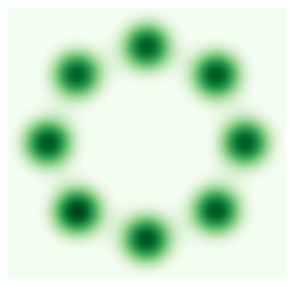

C:\Users\alber\Anaconda3\lib\site-packages\seaborn\distributions.py:1184: UserWarning: The following kwargs were not used by contour: 's'
  **contour_kws,


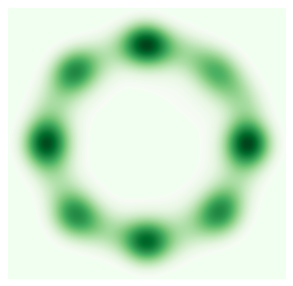

In [3]:
# true samples
true_samples = genfromtxt('true_samples.csv', delimiter=',')
sns.set(rc={'axes.facecolor': 'honeydew', 'figure.figsize': (5.0, 5.0)})
plt.xlim((-plot_lim, plot_lim))
plt.ylim((-plot_lim, plot_lim))
ax1 = sns.kdeplot(x=true_samples[:, 0], y=true_samples[:, 1], s=0.1, alpha=1, shade=True, n_levels=1000, cmap='Greens')
ax1.set(yticklabels=[])
ax1.set(xticklabels=[])
ax1.grid(False)
plt.margins(0, 0)
plt.savefig('true_scatter.jpg')
plt.show()
plt.close('all')

# generated samples
gen_samples = genfromtxt('generated_samples.csv', delimiter=',')
sns.set(rc={'axes.facecolor': 'honeydew', 'figure.figsize': (5.0, 5.0)})
plt.xlim((-plot_lim, plot_lim))
plt.ylim((-plot_lim, plot_lim))
ax1 = sns.kdeplot(x=gen_samples[:, 0], y=gen_samples[:, 1], s=0.1, alpha=1, shade=True, n_levels=1000, cmap='Greens')
ax1.set(yticklabels=[])
ax1.set(xticklabels=[])
ax1.grid(False)
plt.margins(0, 0)
plt.savefig('8modes_kde_scatter.jpg')
plt.show()
plt.close('all')

### Loss graph

In [4]:
# loading loss data
loss = genfromtxt('loss.csv', delimiter=',')

In [5]:
loss_plot = []

# store 1~10th iteration
for i in range(10):
    loss_plot.append(loss[i+1])

# store per 10 iterations  
for i in range(399):
    loss_plot.append(loss[11+10*i])

# make loss_plot to numpy array
loss_plot = np.array(loss_plot)

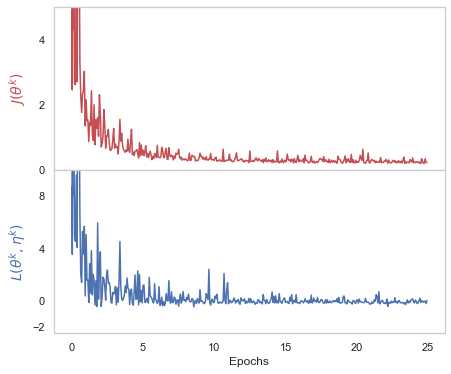

In [6]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(7,6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(loss_plot[:,0]/160, loss_plot[:,1], 'r')
plt.ylim([0,5])
plt.ylabel(r"$J(\theta^k)$", fontsize=14, color='r')
ax0.set_yticks(np.arange(0,5,2))
plt.setp(ax0.get_xticklabels(), visible=False)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(loss_plot[:,0]/160,-loss_plot[:,2], 'b')
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
ax1.set_yticks([-2,0,4,8])
plt.ylim([-2.5,10])
plt.ylabel(r"$L(\theta^k, \eta^{k})$",fontsize=14, color='b')
plt.xlabel("Epochs",fontsize=12)
fig.align_ylabels()

# # remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
plt.savefig('loss.png')
plt.show()
plt.close('all')